# PCA on Olivetti Images
In this notebook, we will apply PCA on Olivetti Images, dataset in SKlearn. This will be just to understand the process that goes into it<br>
<br>
Thanks to AT&T Laboratories, Cambridge for providing us this dataset

In [1]:
# Importing Libraries
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Grabbing the dataset
olivetti = datasets.fetch_olivetti_faces()   # This will download all the images for ur

In [3]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

## Let's plot these images
Below, I am going to draw 64 of these images. Just to get a feel of how these images actually look like.

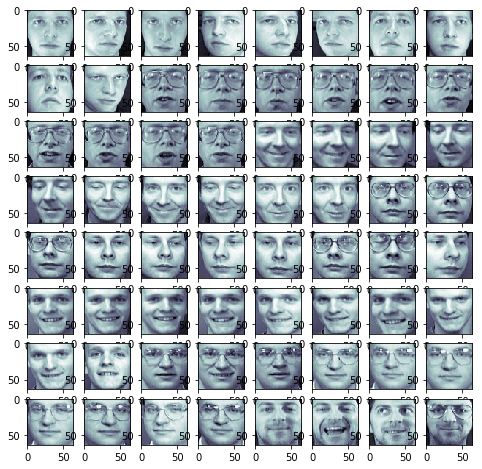

In [4]:
fig = plt.figure(figsize=(8,8))
for i in range(64) :
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(olivetti.images[i], cmap = plt.cm.bone)
    
plt.show()

## Let's apply PCA on these images
Since these images are 64x64, this means each image has 4096 features. That is a huge number of features to be working with. It would be smart to apply PCA and get a smaller set of features that may perfectly describe the data without much loss of generality

In [5]:
x = olivetti.data  # Array of 400x4096
y = olivetti.target 

In [6]:
pca = PCA()  # If we do not specify n_components, by default, it takes n_components = min(n, m)
# i.e. minimum of number of original features and number of data points
# In our case by default, it takes n_components = min(400, 4096) i.e. 400
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
pca.components_.shape   # we can see we have 400 components, each component, a unit vector of 4096 dimensionality

(400, 4096)

### Let's figure out the number of components that we need

In [8]:
k = 0   # assuming we need k components
total_variance = pca.explained_variance_.sum()  # total variance
current_variance = 0
while current_variance/total_variance < 0.95 :   # we want to keep 95% of the total variance
    current_variance += pca.explained_variance_[k]
    k += 1
    
k

123

It seems we only need 123 features to maintain 95% of the total variance that the original data had

In [9]:
pca = PCA(n_components=k)  # applying PCA with 123 features only as we can obtain 95% of the variance
# By putting whiten=True, we are KINDA applying feature scaling to the new 123 features
# By applying KINDA feature scaling, we are making sure that the variance of each of
# these 123 features is same
x_transformed = pca.fit_transform(x)
x_transformed.shape

(400, 123)

### Let's try to get our images back and see what imformation we have lost

In [10]:
x_approx = pca.inverse_transform(x_transformed)  # Get approximate data back
x_approx.shape

(400, 4096)

Let's reshape these images from 4096 to 64x64 so that they can be plotted

In [11]:
x_approx_images = x_approx.reshape((400, 64, 64))

Let's plot these approx images now

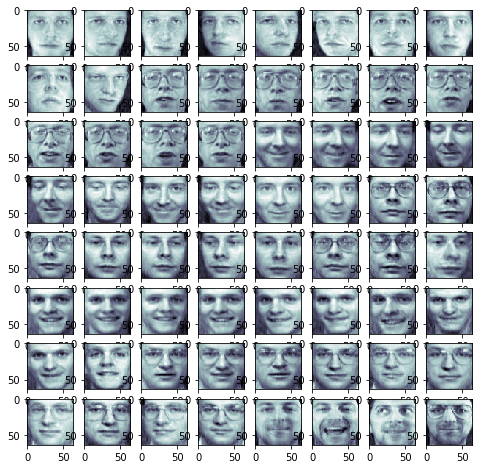

In [12]:
fig = plt.figure(figsize=(8,8))
for i in range(64) :
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
    
plt.show()

# Miracle, Miracle, Miracle

As we can see, we haven't lost much data. We can still look these images

# Let's try to view the components
When we applied PCA using 123 components, we received 123 components. Each of these components was a **Eigen Unit Vector** of new axis w.r.t previous axis. *(Look into PCA Notebooks to understand more about this)*<br>
Each of these 123 **Eigen Unit Vectors** has 4096 features. Let's try to plot these **Eigen Vectors** and let's try to see if they are random or have some pattern to them

In [13]:
eigen_vectors = pca.components_
eigen_vectors.shape

(123, 4096)

Let's reshape each of these Eigen Vectors as 64x64 images

In [14]:
eigen_vectors_new = eigen_vectors.reshape((123, 64, 64))

Let's plot these **Unit Eigen Vectors**

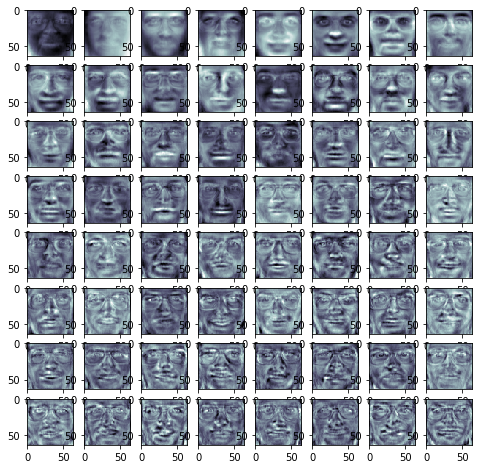

In [15]:
fig = plt.figure(figsize=(8,8))
for i in range(64) :
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigen_vectors_new[i], cmap = plt.cm.bone)
    
plt.show()

We can see that these Eigen Unit Vectors, though spooky, do have some kind of pattern in them.<br>
Broadly speaking, each of these Eigen Unit Vectors correspond to some kind of feature in a face.<br>
That is why, in case of images, Eigen Vectors are called **Eigen Faces**